<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
sat_scores = pd.read_csv('sat_scores.csv')

#Method 1 to convert csv into a dictionary:
#create an empty dictionary
sat_dictionary = {}

#add new key/value pairs to this empty dictionary, by slicing the columns of the dataframe appropriately.
for column in list(sat_scores.columns):
    sat_dictionary[column] = list(sat_scores[column])


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#using the SAT dictionary to create a pandas dataframe:
sat_scores_2 = pd.DataFrame.from_dict(sat_dictionary)
print(sat_scores_2.head())
print(sat_scores_2.info())

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


In [4]:
#using the pandas .read_csv function to create a pandas dataframe:
sat_scores = pd.read_csv('sat_scores.csv')
print(sat_scores.head())
print(sat_scores.info())

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


Here, it appears that loading from the file and inputting a dictionary produce the same dataframe.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
# If we inspect the tail, we can see that the final row is an 'all' row, which gives the mean values
# for rate, verbal and math across all countries.
sat_scores.tail(1)

,State,Rate,Verbal,Math
51,All,45,506,514


In [7]:
#let's drop this row so it doesnt affect our visualisations. 
sat_scores.drop(sat_scores.tail(1).index,inplace=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

State: US state

Rate: SAT participation rate

Verbal: mean SAT verbal score

Math: mean SAT math score



Shape: (52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

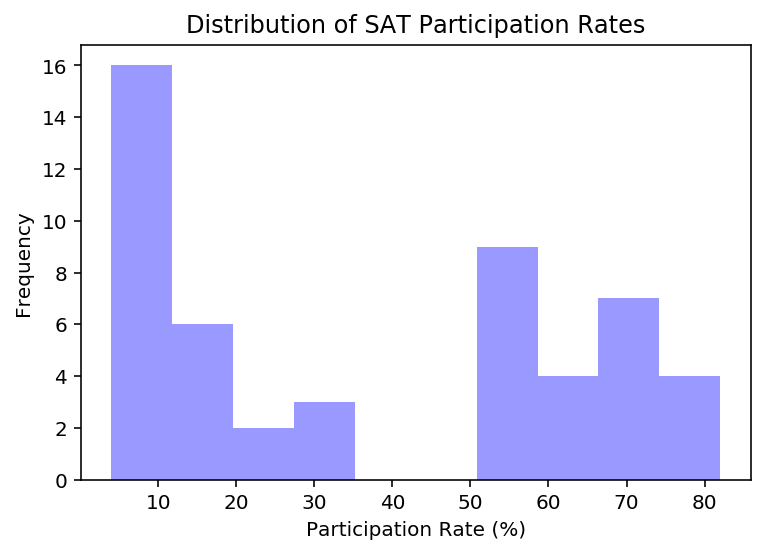

In [8]:
import seaborn as sns
rate_histogram = sns.distplot(sat_scores['Rate'],kde=False,bins=10,color='b');
rate_histogram.set_title('Distribution of SAT Participation Rates');
rate_histogram.set_ylabel('Frequency');
rate_histogram.set_xlabel('Participation Rate (%)');

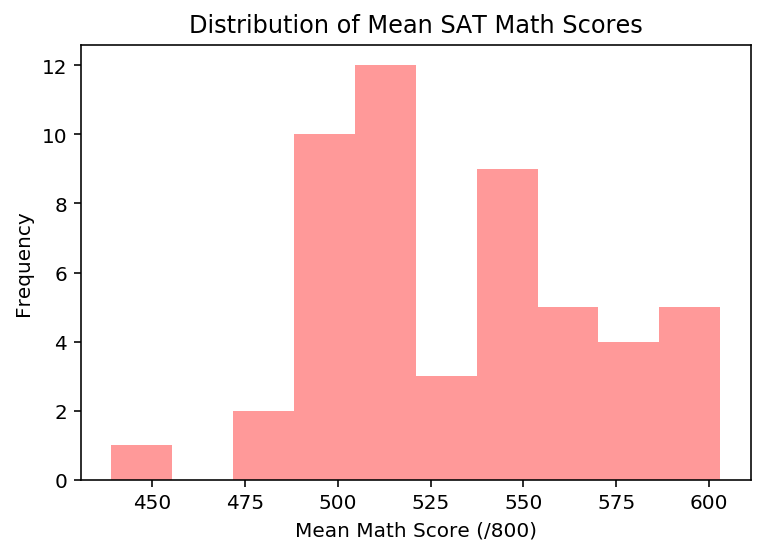

In [9]:
math_histogram = sns.distplot(sat_scores['Math'],kde=False,bins=10,color='r');
math_histogram.set_title('Distribution of Mean SAT Math Scores');
math_histogram.set_ylabel('Frequency');
math_histogram.set_xlabel('Mean Math Score (/800)');
math_histogram;

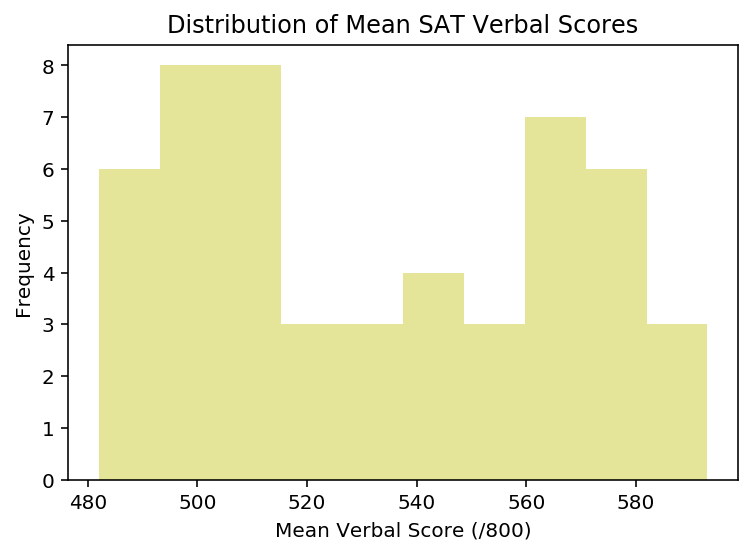

In [10]:
verbal_histogram = sns.distplot(sat_scores['Verbal'],kde=False,bins=10,color='y');
verbal_histogram.set_title('Distribution of Mean SAT Verbal Scores');
verbal_histogram.set_ylabel('Frequency');
verbal_histogram.set_xlabel('Mean Verbal Score (/800)');
verbal_histogram;

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [11]:
#First, let's categorise the states into different regions:
West =  ['WA', 'OR', 'CA', 'MT', 'ID', 'NV', 'AZ', 'WY', 'UT', 'CO', 'NM'] #total = 11
Midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'] #total = 12
Northeast =  ['ME', 'NH', 'MA', 'CT', 'VT', 'RI', 'NJ', 'NY', 'PA'] #total = 9
South =  ['TX', 'OK', 'AR', 'LA', 'MS', 'TN', 'AL', 'KY', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'DC', 'MD', 'DE'] #total = 17
Pacific =  ['AK', 'HI'] #total = 2

#next, let's use a for loop to classify the states in our dataframe, adding them to a new column called 'Region'
for i, row in sat_scores.iterrows():
      if row['State'] in West:
            sat_scores.at[i,'Region'] = 'West' 
      elif row['State'] in Midwest:
            sat_scores.at[i,'Region'] = 'Midwest' 
      elif row['State'] in Northeast:
            sat_scores.at[i,'Region'] = 'Northeast' 
      elif row['State'] in South:
            sat_scores.at[i,'Region'] = 'South' 
      elif row['State'] in Pacific:
            sat_scores.at[i,'Region'] = 'Pacific' 

/Users/Tazman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


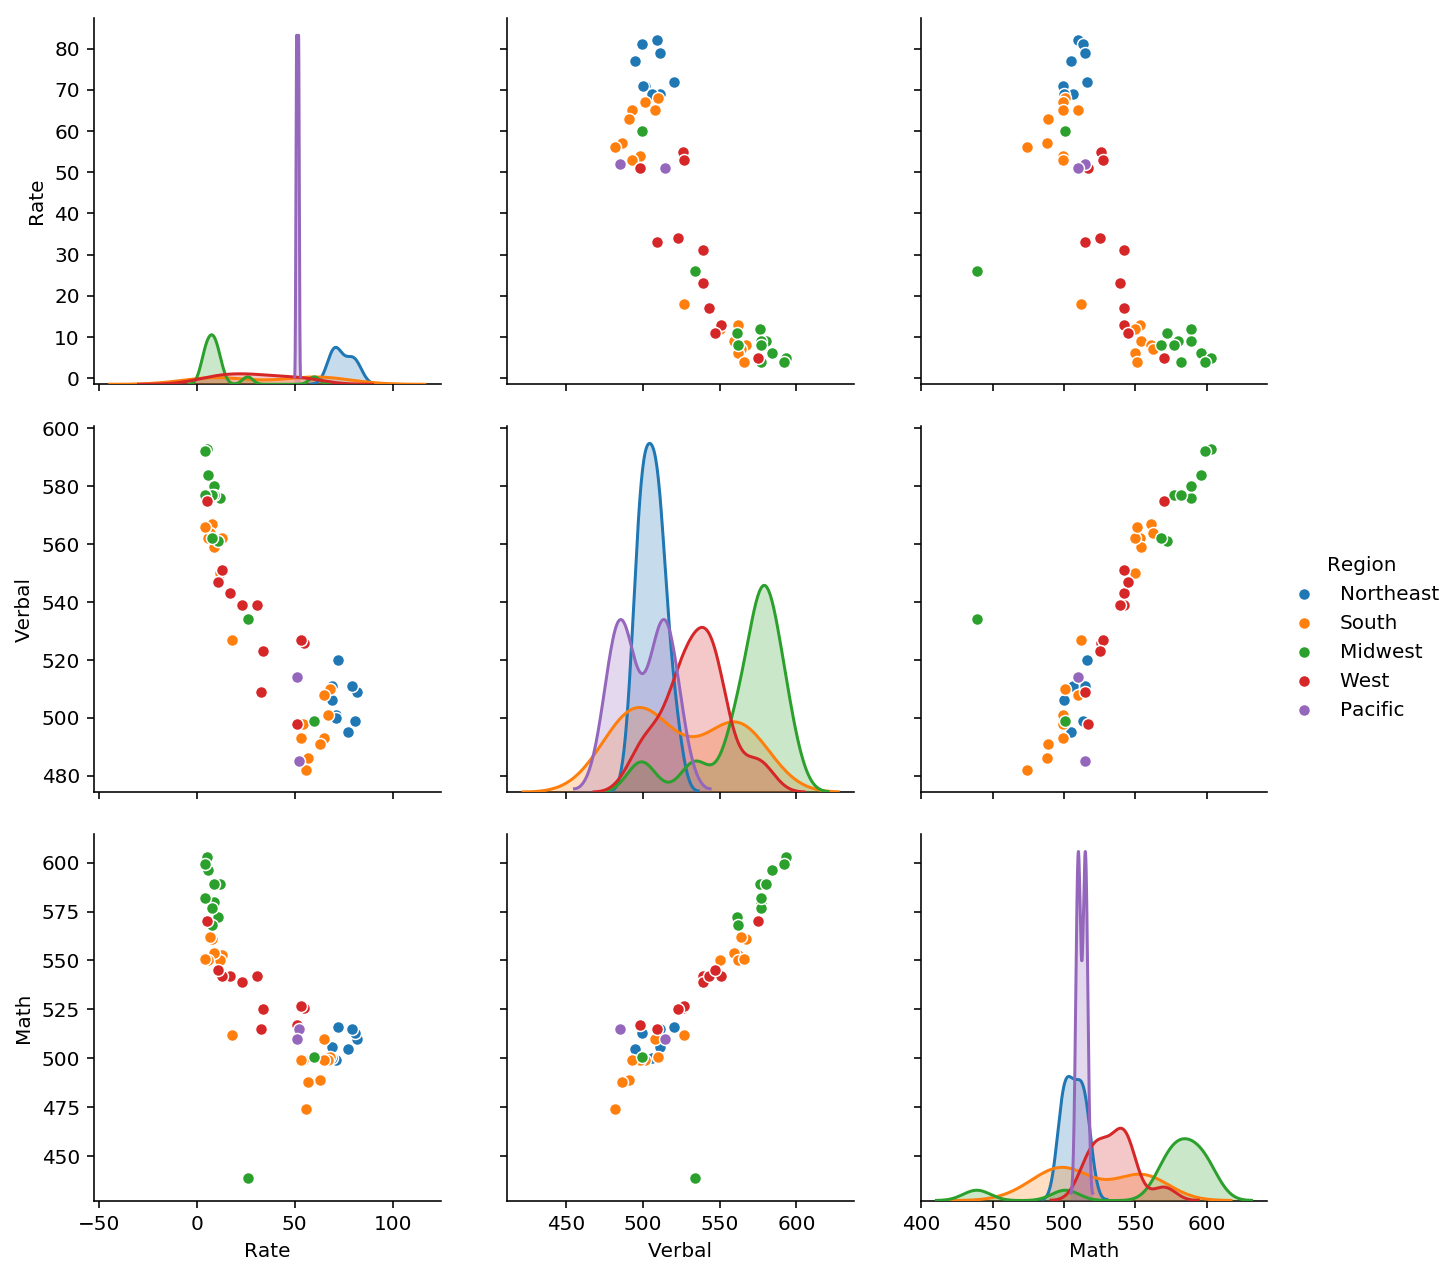

In [12]:
sns.pairplot(sat_scores, hue = 'Region', size=3);

Findings:

There appears to be a strong positive relationship between mean math score and mean verbal score

Participation rate appears to share a moderate negative relationship with both mean math score and mean verbal score.

The region with the highest math and verbal scores (Midwest) had the lowest participation rate. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

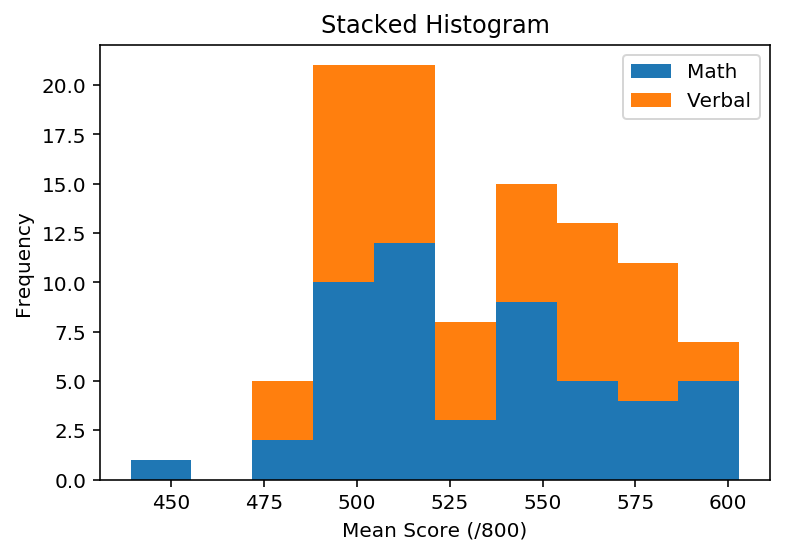

In [13]:
stacked_histogram = sat_scores[['Math','Verbal']].plot.hist(stacked=True,bins=10, title='Stacked Histogram');
stacked_histogram.set_xlabel('Mean Score (/800)');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'Mean Score (/800)')

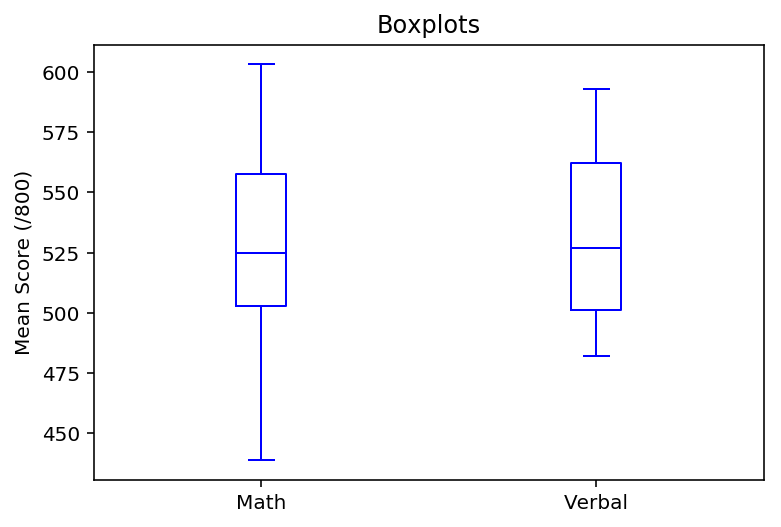

In [14]:
boxplots = sat_scores[['Math','Verbal']].plot.box(color='b',title = 'Boxplots');
boxplots.set_ylabel('Mean Score (/800)')

Benefits of boxplots: 

You can easily see both the shape (skewed,symmetrical,etc) and the five-number summary (min,q1,median,q3,max) of the distribution

'Rate' shouldn't be plotted on this chart because it is of a different scale to 'Math/Verbal' (it is a percentage).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


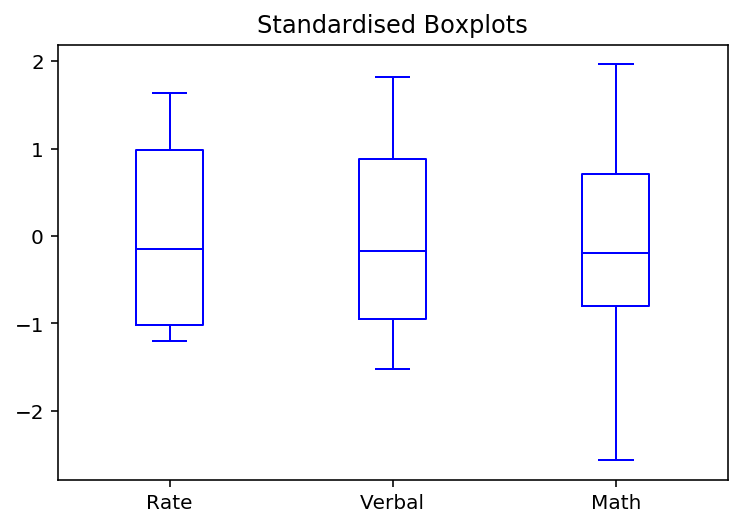

In [15]:
#First, let's standardise all of our numerical columns:
numerical_columns = sat_scores[['Rate','Verbal','Math']]
stand_sat_scores = (numerical_columns - numerical_columns.mean())/numerical_columns.std()

#Now, let's create the boxplots
stand_boxplots = stand_sat_scores.plot.box(color='b',title = 'Standardised Boxplots');

Standardisation involves converting all of a columns scores into z-scores. These z-scores will have a mean of 0 
and a standard deviation of 1. This standardisation process allows us compare variables that were previously on different scales.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
verbal_gt_mean = list((sat_scores.loc[sat_scores['Verbal']>np.mean(sat_scores['Verbal']),'State']))
print(verbal_gt_mean)
len(verbal_gt_mean)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


24

24 states have verbal scores are above the mean. Given 52 states, this could suggest a symmetric/slightly positively skewed distribution

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
verbal_gt_median = list(sat_scores.loc[sat_scores['Verbal']>np.median(sat_scores['Verbal']),'State'])
print(verbal_gt_median)
len(verbal_gt_median)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


24

The same 24 states also have verbal scores above the median. This makes sense, as there are no states with a verbal score in between the median (527) and the mean (532.5).

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
sat_scores['difference'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Region,difference
0,CT,82,509,510,Northeast,-1
1,NJ,81,499,513,Northeast,-14
2,MA,79,511,515,Northeast,-4
3,NY,77,495,505,Northeast,-10
4,NH,72,520,516,Northeast,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
#the .sort_values() function can be used to sort the dataframe by the given column
verbal_better_than_math = sat_scores.sort_values(by=['difference'])[::-1][0:10]
verbal_better_than_math.head(3)

,State,Rate,Verbal,Math,Region,difference
27,OH,26,534,439,Midwest,95
50,MS,4,566,551,South,15
29,WV,18,527,512,South,15


In [20]:
math_better_than_verbal = sat_scores.sort_values(by=['difference'])[0:10]
math_better_than_verbal.head(3)

,State,Rate,Verbal,Math,Region,difference
21,HI,52,485,515,Pacific,-30
23,CA,51,498,517,West,-19
1,NJ,81,499,513,Northeast,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat_scores[['Math','Verbal','Rate']].corr().style.background_gradient(cmap='coolwarm')


,Math,Verbal,Rate
Math,1,0.899909,-0.773419
Verbal,0.899909,1,-0.888121
Rate,-0.773419,-0.888121,1


The correlation matrix tells us the pearson correlation coefficient between pairs of variables. Coefficients close to -1 represent a strong negative relationship, coefficients close to +1 represent a strong positive relationship, and coefficients close to 0 represent a non-relationship.

This matrix tells us:

'Math' and 'Verbal' share a strong positive relationship (r = 0.899909)

'Rate' and 'Verbal' share a strong negative relationship (r = -0.888121)

'Math' and 'Rate' share a moderate negative relationship (r = -0.773419)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
sat_scores[['Rate','Verbal','Math']].describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [23]:
sat_scores[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


1. Covariance and correlation both measure the level of dependency between two numerical variables. However, covariance expresses the unscaled relationship (a number between -∞ and +∞) and correlation expresses the scaled relationship (a number between -1 and 1). Correlation is more commonly used than covariance, and we can use a formula to convert covariance to correlation.


2. Correlation(x, y) =  Covariance(x, y) / (Sx*Sy), 
    where 'x' and 'y' are variables and 'S' is the standard deviation.
    
    
3. Correlation is preferred because it isn't affected by scale. It doesn't matter if someone is working with kilograms or grams, metres or miles, a small std or a large std, correlation will always force the relationship to expressed as a number between -1 and 1. Resultantly, this allows relationships between different pairs of variables to be fairly compared.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [24]:
import pandas as pd
df = pd.read_csv('drug-use-by-age.csv')

#this changes the maximum number of columns shows to 30
pd.set_option('display.max_columns', 12) 

df #let's check out the data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,...,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,...,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,...,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,...,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,...,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,...,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,...,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,...,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,...,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,...,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,...,4.1,10.0,0.6,2.0,0.3,9.0


In [25]:
df.select_dtypes(['object']).columns

Index(['age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency'],
      dtype='object')

In [26]:
#no data is missing, however, we need to do some cleaning

#first, let's convert the hyphens into zeroes
df = df.replace('-',0.0) 

#second, let's replace the non-integer age values into into integers, by calculating the class centre:
df['age'][10:] = [22.5, 24.5, 27.5, 32, 42, 57, 65] 

#third, let's convert the 'object' columns into floats
for variable in ['age','cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']:
    df[variable] = df[variable].astype(float)
df

/Users/Tazman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,...,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798,3.9,3.0,1.1,4.0,...,0.2,2.0,0.0,0.0,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,...,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,...,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,...,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,...,1.8,9.5,0.3,36.0,0.2,3.0
5,17.0,3038,49.3,13.0,28.0,36.0,...,2.8,9.0,0.6,48.0,0.5,6.5
6,18.0,2469,58.7,24.0,33.7,52.0,...,3.0,8.0,0.5,12.0,0.4,10.0
7,19.0,2223,64.6,36.0,33.4,60.0,...,3.3,6.0,0.4,105.0,0.3,6.0
8,20.0,2271,69.7,48.0,34.0,60.0,...,4.0,12.0,0.9,12.0,0.5,4.0
9,21.0,2354,83.2,52.0,33.0,52.0,...,4.1,10.0,0.6,2.0,0.3,9.0


In [27]:
#let's split this dataframe into two smaller dataframes - one for usage and one for frequency!
#let's delete 'n' for now, as I don't want to include sample size in any mutlivariate analysis
df_usage = df[['age','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
df_usage.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,...,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12.0,3.9,1.1,0.1,0.0,0.1,...,2.0,0.1,0.2,0.2,0.0,0.2
1,13.0,8.5,3.4,0.1,0.0,0.0,...,2.4,0.1,0.3,0.3,0.1,0.1
2,14.0,18.1,8.7,0.1,0.0,0.1,...,3.9,0.4,0.9,0.8,0.1,0.2
3,15.0,29.2,14.5,0.5,0.1,0.2,...,5.5,0.8,2.0,1.5,0.3,0.4
4,16.0,40.1,22.5,1.0,0.0,0.1,...,6.2,1.1,2.4,1.8,0.3,0.2


In [28]:
df_freq = df[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]
df_freq.head()

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,...,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12.0,3.0,4.0,5.0,0.0,35.5,...,36.0,24.5,52.0,2.0,0.0,13.0
1,13.0,6.0,15.0,1.0,3.0,0.0,...,14.0,41.0,25.5,4.0,5.0,19.0
2,14.0,5.0,24.0,5.5,0.0,2.0,...,12.0,4.5,5.0,12.0,24.0,16.5
3,15.0,6.0,25.0,4.0,9.5,1.0,...,10.0,3.0,4.5,6.0,10.5,30.0
4,16.0,10.0,30.0,7.0,1.0,66.5,...,7.0,4.0,11.0,9.5,36.0,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### Drug Usage:

In [29]:
#let's calculate the descriptive statistics for each variable, and sort them in descending order of mean
df_usage.describe().T.sort_values(by ='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
age,17.0,25.617647,15.356726,12.0,16.0,20.0,27.5,65.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
tranquilizer-use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
stimulant-use,17.0,1.917647,1.407673,0.0,0.6,1.8,3.0,4.1
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7


In this dataframe, alcohol and marijuana are the most popular drugs, while meth, heroin, crack and sedatives are the least popular drugs. 

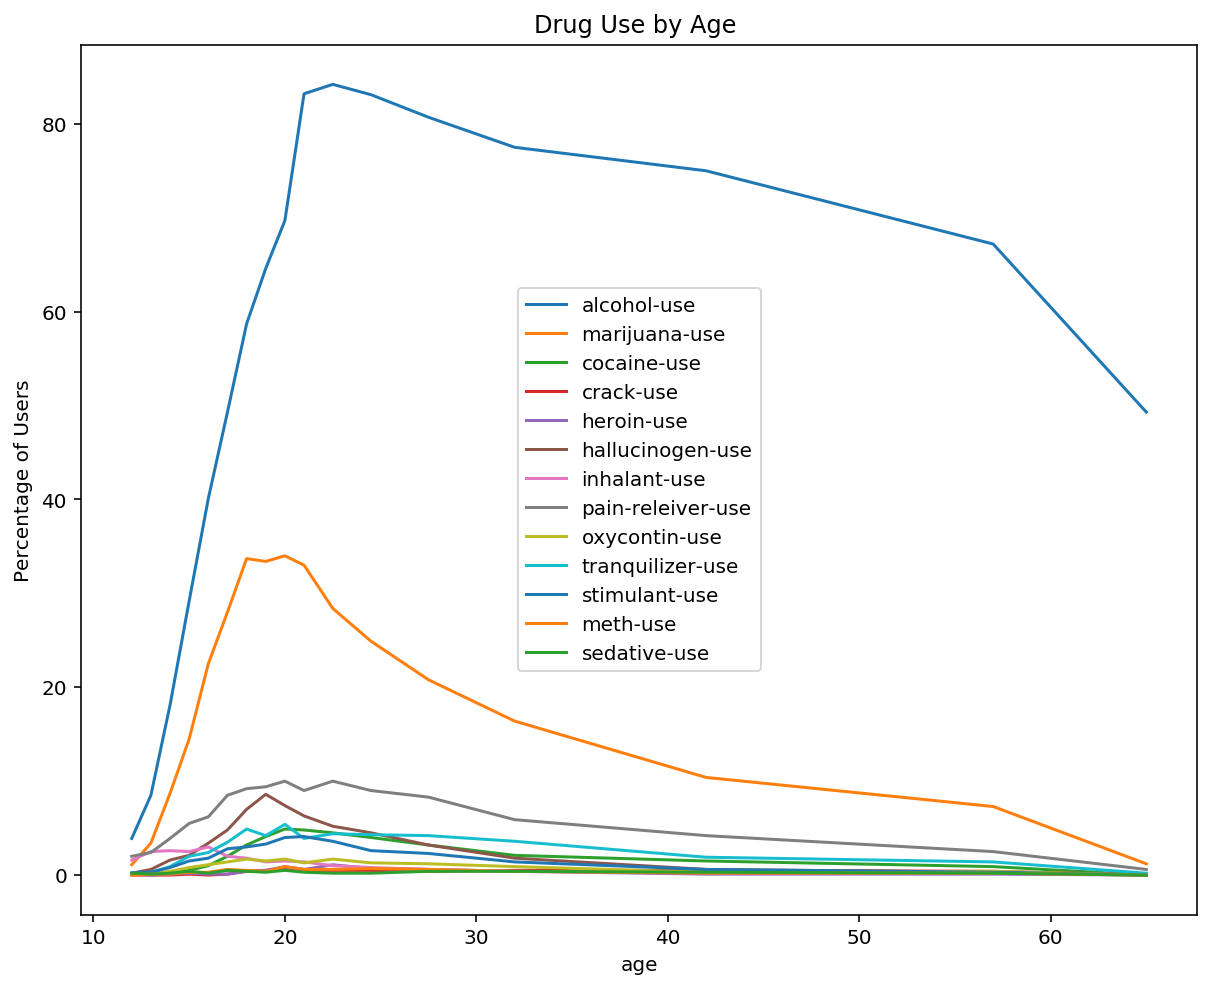

In [30]:
#let's see how drug use changes as a function of age
ax = df_usage.plot.line(x='age', y=None,figsize=(10,8),title='Drug Use by Age ',);
ax.set_ylabel('Percentage of Users');

In general, we can see that drug use tends to peak in popularity from ages 20 to 25.

As expected, alcohol is the most popular drug across all age groups. It sharply increases in popularity from ages 12 to 22, and then begins to slowly decline in popularity. We can see that between ages 18 and 65, a majority of people drink alcohol, and that its popularity soars 40-70% above all other drugs. 

Marijuana is the second most popular drug across all age groups, peaking at 34% at age 20. Unlike alcohol, marijuana-use exhibits a very prominent peak in the college years, which suggests people quit marijuana quicker than they quit alcohol. The illegality of marijuana could also come into play here. 

Let's zoom in on this graph to take a closer look at the other drugs. 

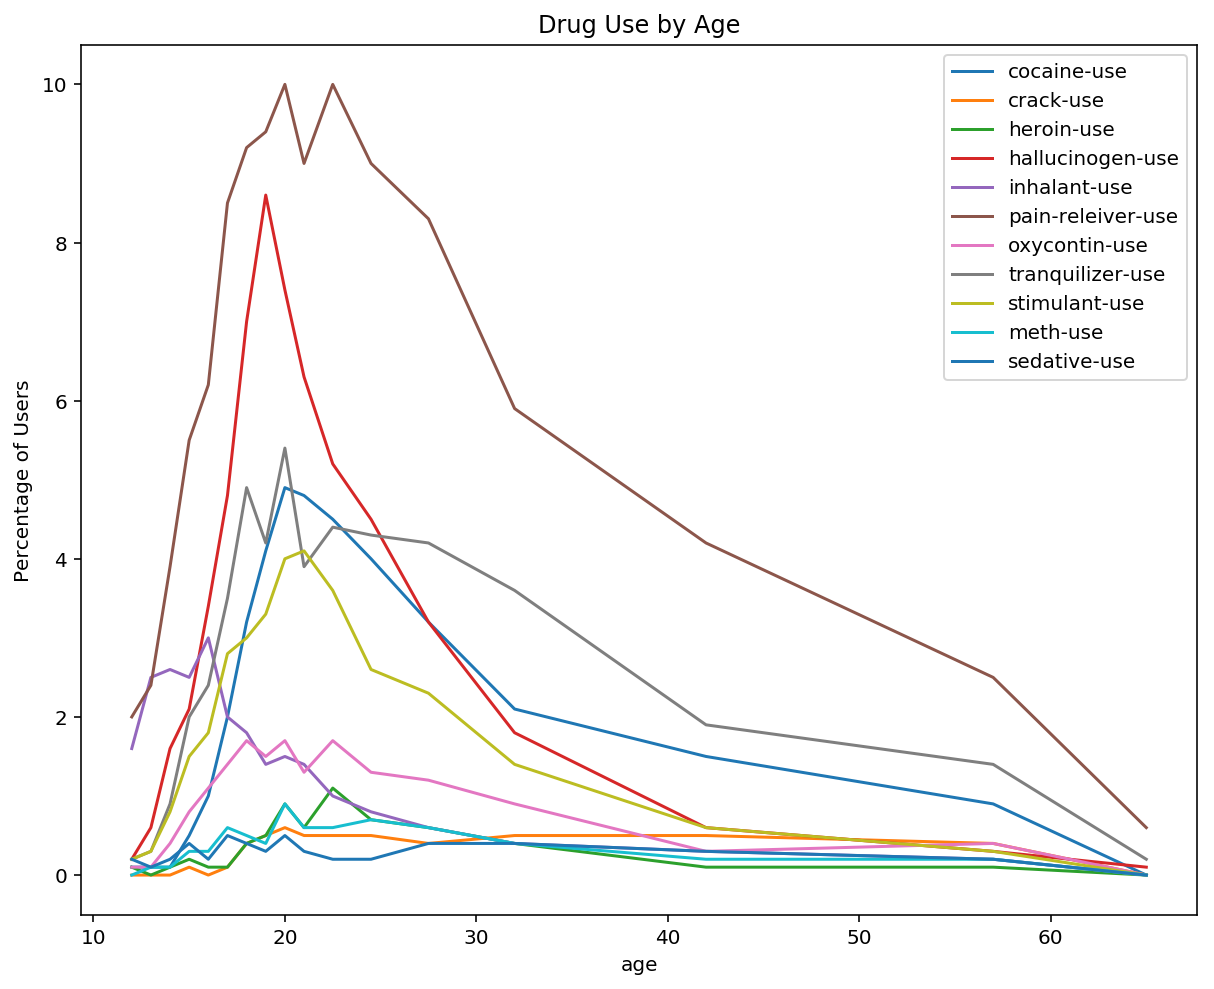

In [31]:
#let's see how certain drug use changes as a function of age
ax = df_usage[['age','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']].plot.line(x='age', y=None,figsize=(10,8),title='Drug Use by Age');
ax.set_ylabel('Percentage of Users');

Interestingly, inhalant use peaks at the unusually young age of 16. This is probably because many inhalants (shoe polish, deodorant, gasoline, etc) are much more readily available to teenagers than other drugs. By the age of 17, we can see that pain-relievers, hallucinogens, tranquilizers, stimulants and cocaine have all overtake inhalants in terms of popularity.

Meth, crack and sedatives exhibit a relatively flat projection and never achieve a usage rate above 1%.

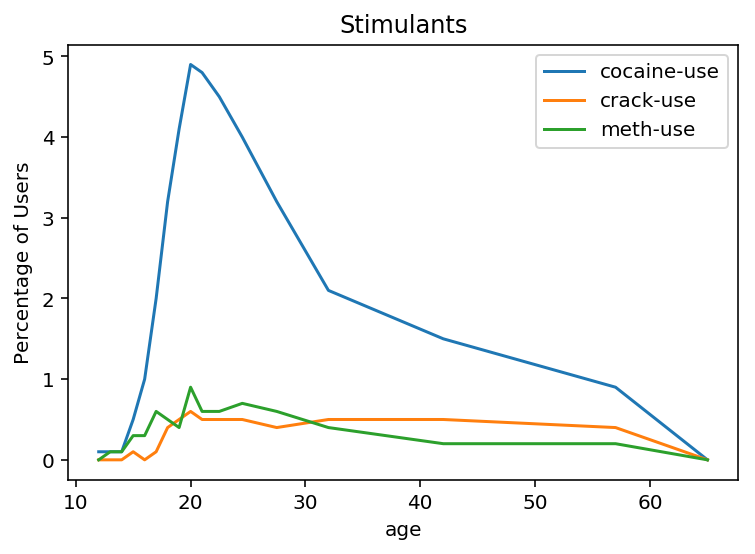

In [32]:
#let's split some of the drugs into 3 different groups - stimulants, depressants, opioids
ax = df_usage[['age','cocaine-use','crack-use','meth-use']].plot.line(x='age', y=None,figsize=(6,4),title='Stimulants');
ax = ax.set_ylabel('Percentage of Users');

Cocaine is a much more popular stimulant than crack and meth. Crack and meth share a similar level of popularity overtime.

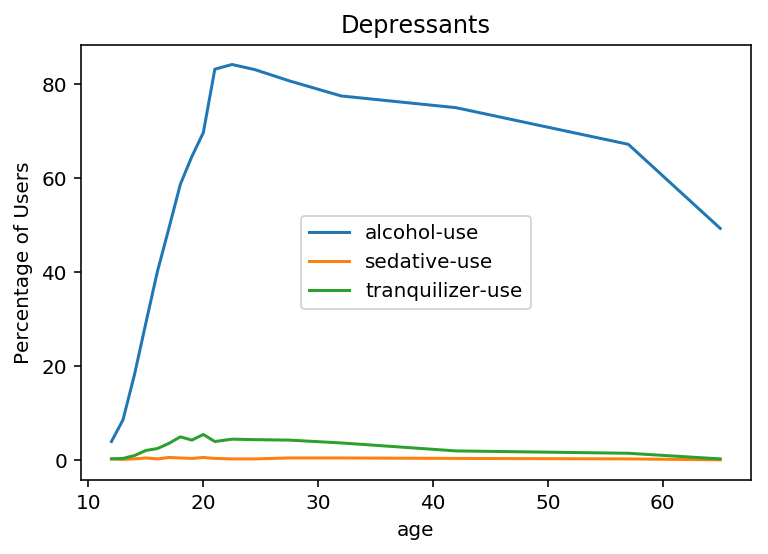

In [33]:
ax = df_usage[['age','alcohol-use','sedative-use','tranquilizer-use']].plot.line(x='age', y=None,figsize=(6,4),title='Depressants');
ax.set_ylabel('Percentage of Users');

Alcohol is (obviously) the preferred depressant. Tranquilizers are slightly more popular than sedatives.

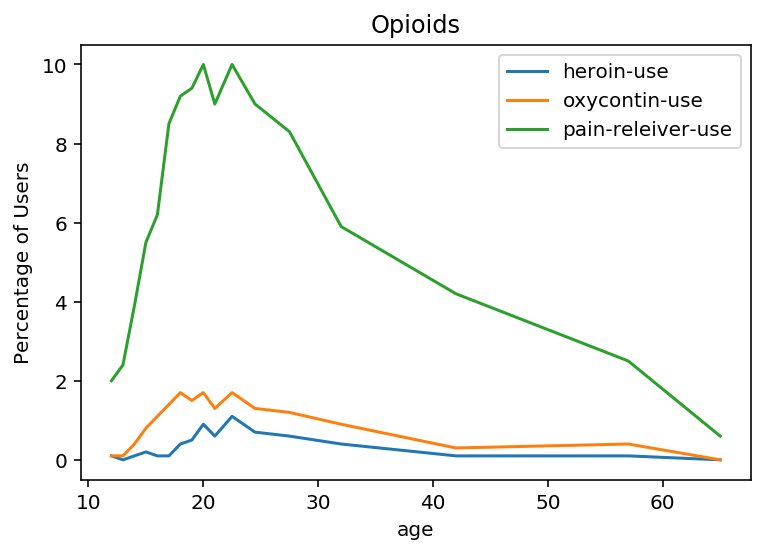

In [34]:
ax = df_usage[['age','heroin-use','oxycontin-use','pain-releiver-use']].plot.line(x='age', y=None,figsize=(6,4),title='Opioids');
ax.set_ylabel('Percentage of Users');

Oxycontin is more popular than heroin across all age groups. 

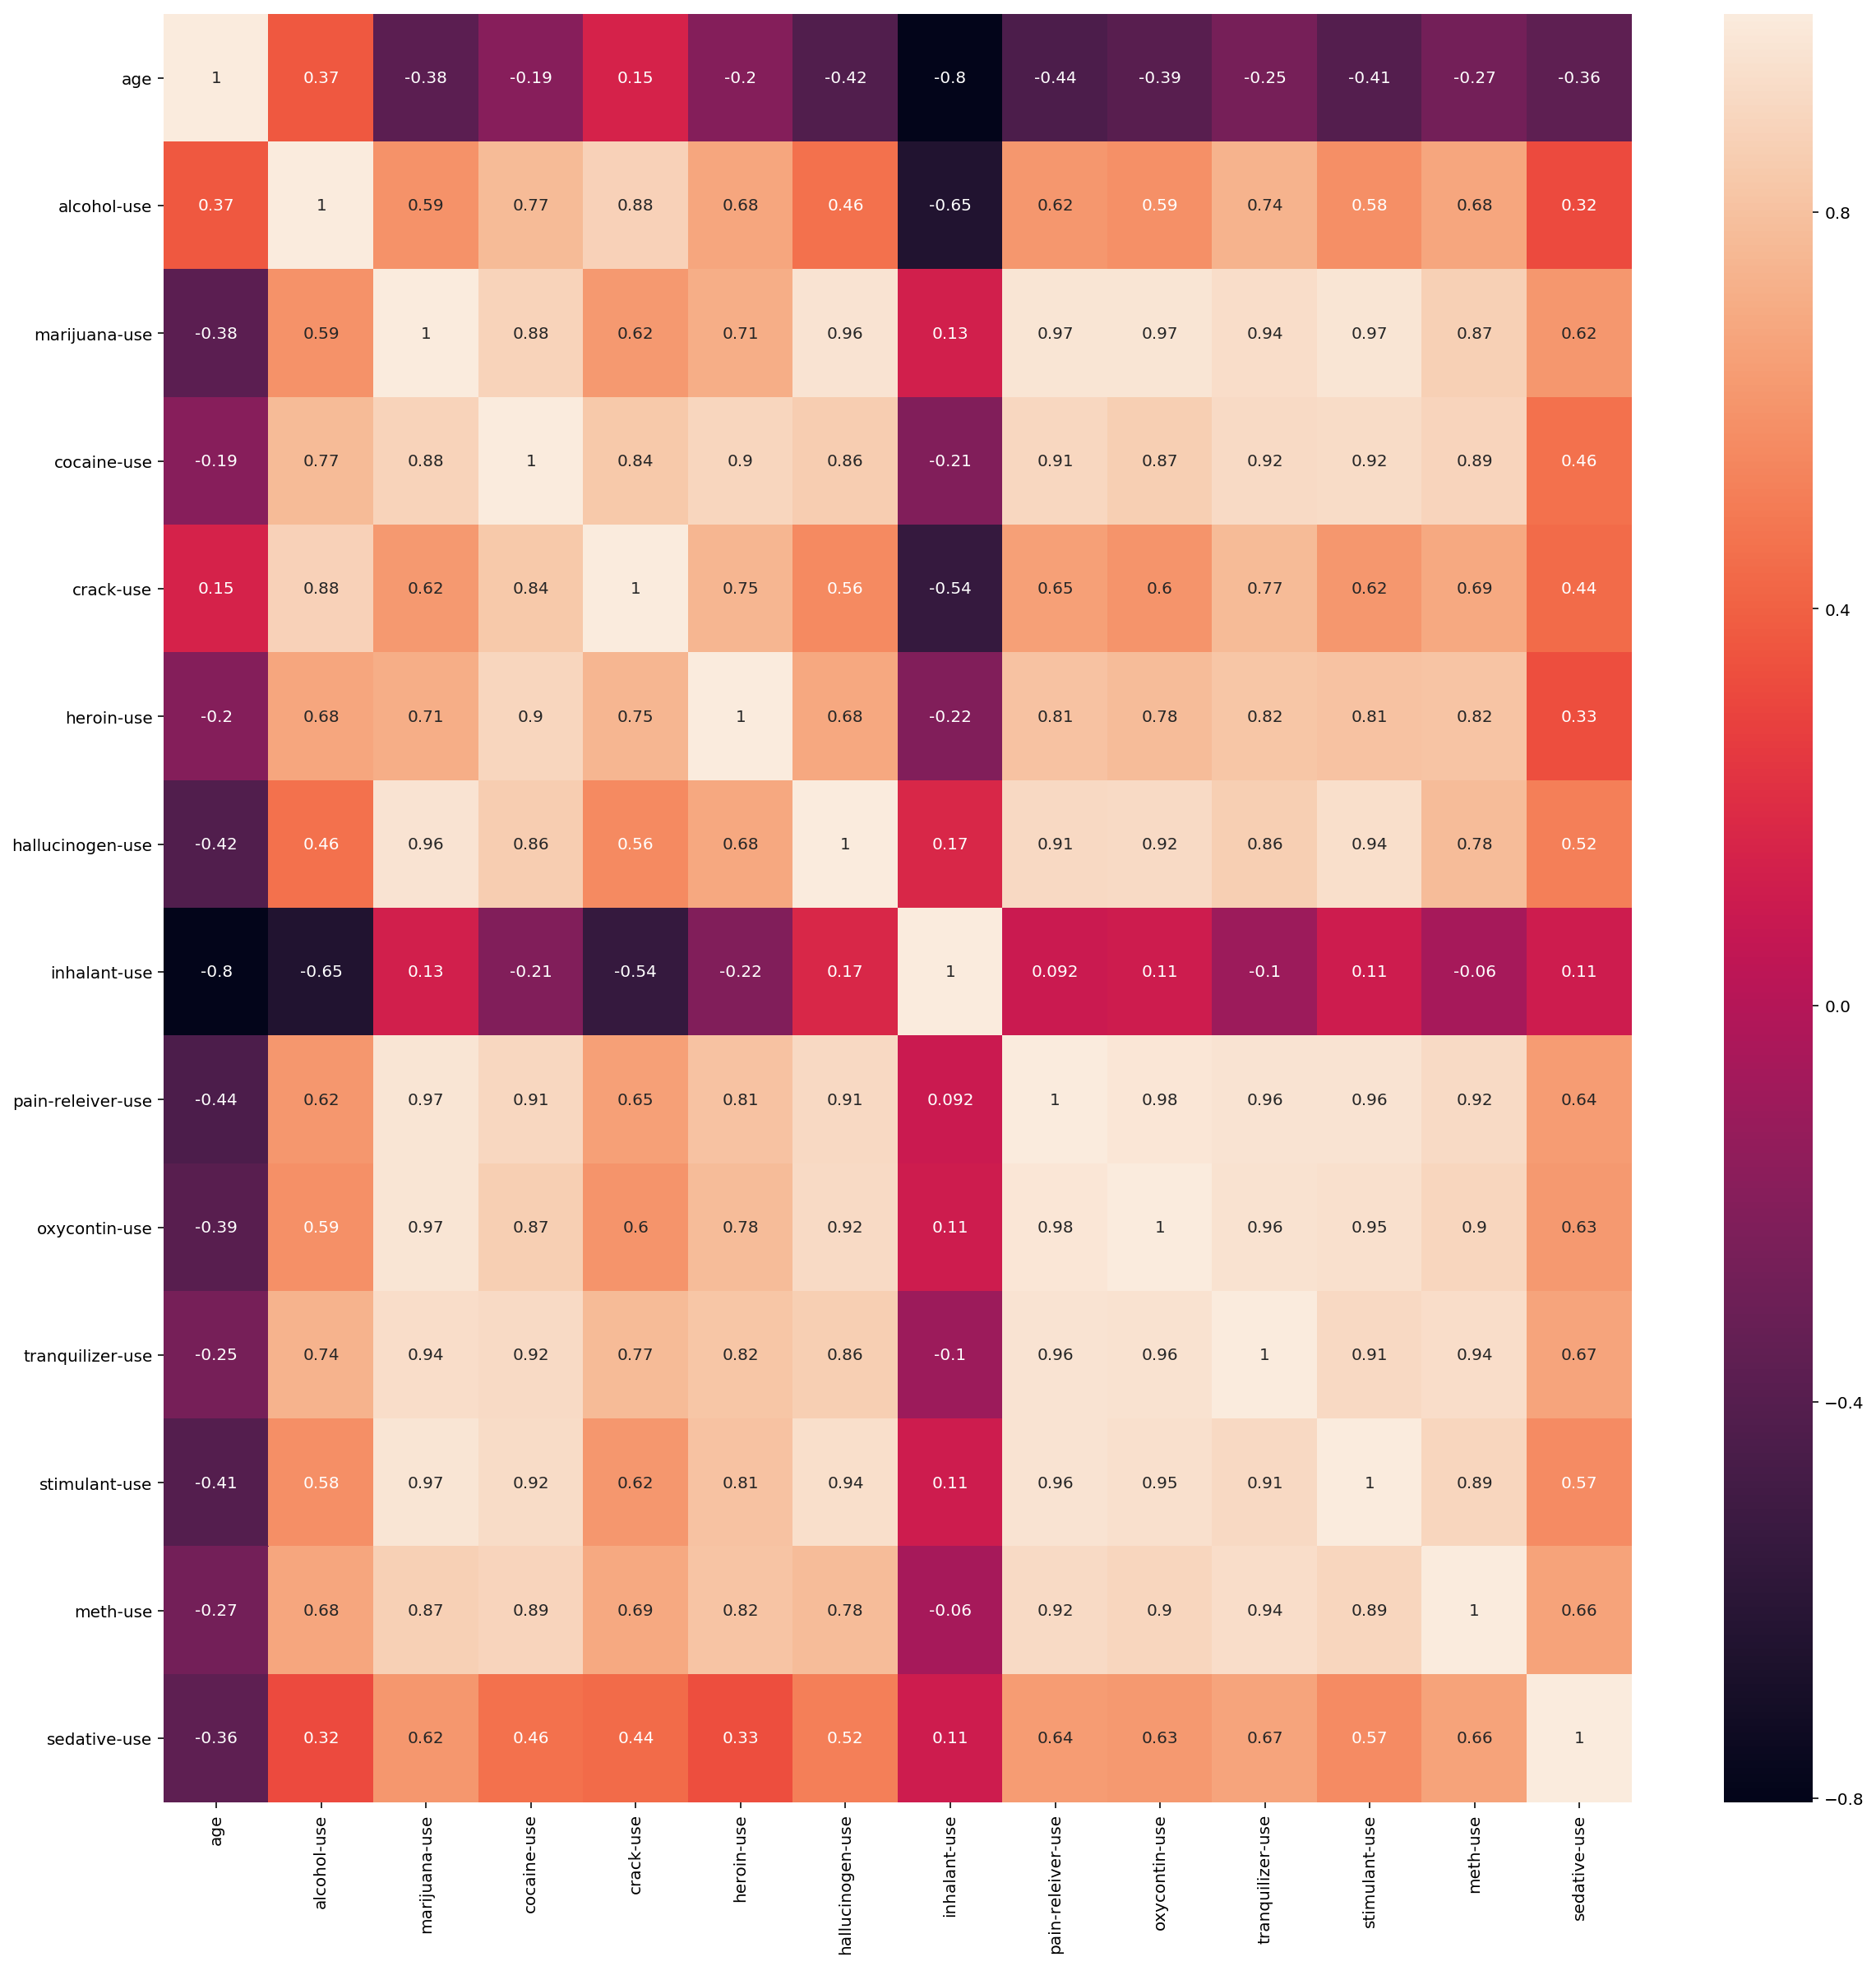

In [35]:
#let's create a heatmap to see the correlations between different drugs.
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df_usage.corr(), annot=True);

As can be seen in the heatmap, the majority of the drugs are positively correlated. This suggests that many of the drugs fluctuate in popularity at similar points in time. 

An interesting point is that inhalant use forms negative correlations with most of the other drugs. This supports our aforementioned idea that teenagers depart inhalants for other drugs as they get older. 

### Drug Frequency

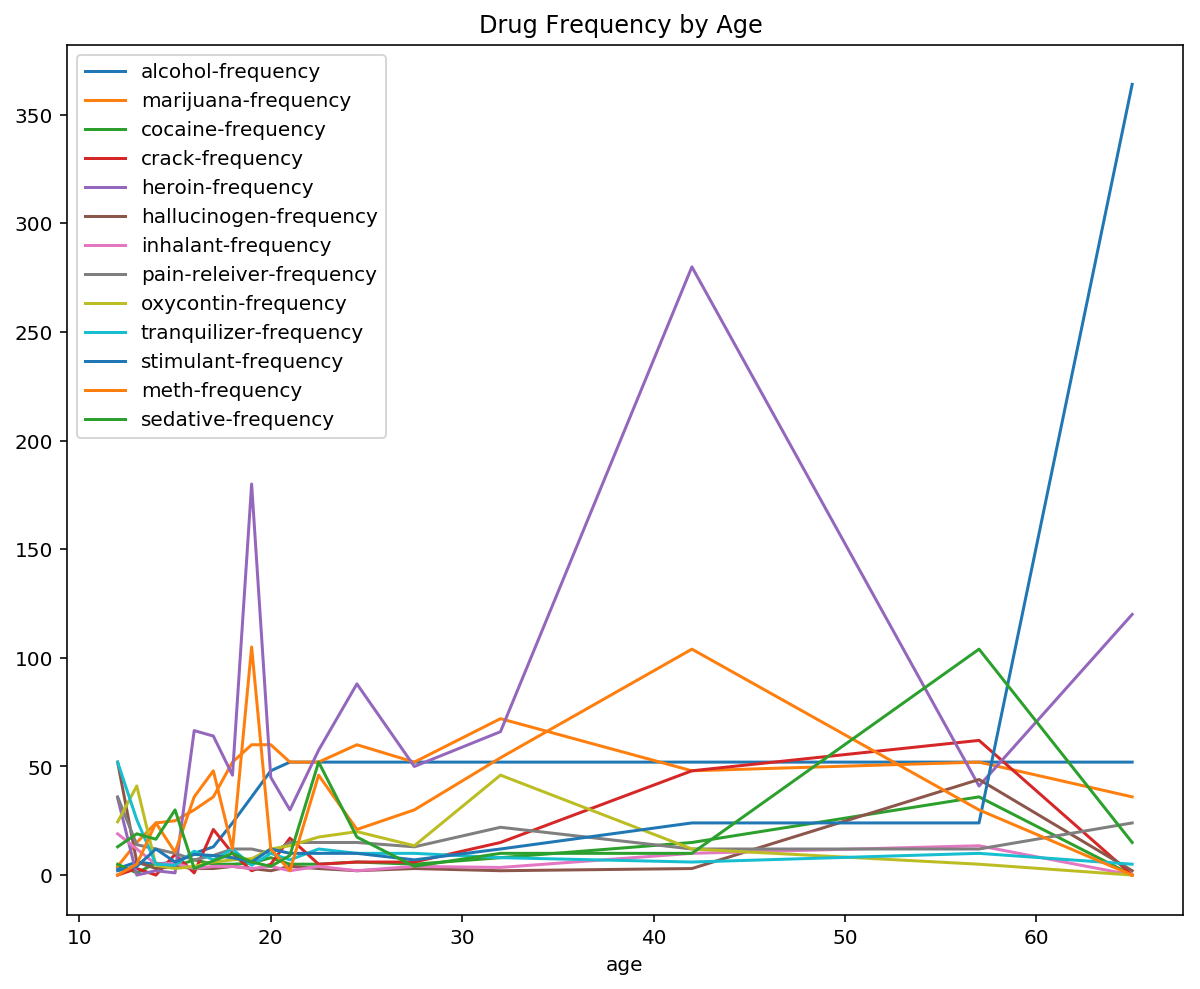

In [36]:
#let's see how drug frequency changes as a function of age
df_freq.plot.line(x='age', y=None,figsize=(10,8),title='Drug Frequency by Age ');

As you can see, drug frequency exhibits are more erratic nature than drug usage. This is potentially due to the relative sample sizes. For the drug usage data, percentages were calculated from very large sample sizes (n = 2233 to n = 7391). However, for the frequency data, only the relative drug users were included so sample sizes were much smaller. This could explain the random stimulant spike at age 65+, where stimulant-use is rounded down to 0.0 and stimulant-frequency is 364. Perhaps it was just 1 person who contributed to this frequency rate!!!

Regardless of potential problems with sample sizes, we can hypothesise that drugs exhibiting higher frequency rates (heroin, meth, marijuana and alcohol) are more addictive in nature. 

### Overall Description
Overall, we can see that drug use changes as a function of age. Drugs become increasingly popular until the age of 20 - 25, and then begin to taper off in popularity. Moreover, the majority of drugs share positive correlations with other drugs, suggesting that popularity fluctuations in one drug are mirrored by popularity fluctuations in other drugs. 

Unsurprisingly, we can confirm that alcohol is the number one drug of choice across all age groups. Between the ages of 18 and 65, a majority of people drink alcohol, and its popularity soars 40 - 70% above that of all other drugs. Notably, alcohol use peaks at a massive 84.1% at age 22 - 23. 

Marijuana is the second most popular drug across all age groups, peaking at 34% at age 20. Unlike alcohol, marijuana-use exhibits a very prominent peak in the college years, which suggests people quit marijuana quicker than they quit alcohol. The illegality of marijuana could also come into play here. 

Interestingly, inhalant use peaks at the unusually young age of 16. This is probably because many inhalants are much more readily available to teenagers than other drugs. By the age of 17, we can see that pain-relievers, hallucinogens, tranquilizers, stimulants and cocaine have all overtake inhalants in terms of popularity. Inhalants are also the only drug that show negative correlations with other drugs, supporting the idea that people depart inhalants for other drugs as they get older. The idea of inhalants being a 'gateway drug' could be investigated further here. 

Meth, crack and sedatives exhibit a relatively flat projection and never achieve a usage rate above 1%.

Grouping by drug type, we can see that alcohol is the most popular depressant, cocaine is the most popular stimulant, and pain-relieving drugs are the most popular opioid. 

Drug frequency shows a less consistent nature than drug usage. Heroin, meth, marijuana and alcohol report the highest frequency rates, which could potentially reflect their addictiveness.

In conclusion, we can see that both drug usage and drug frequency exhibit a number of interesting relationships.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### 1

I would like to explore the relationship between inhalant use and age.

Null hypothesis: In adulthood (ages 18 - 65+), the correlation coefficient between age and inhalant use IS NOT significantly different from 0.

Alternative hypothesis: In adulthood (ages 18 - 65+), the correlation coefficient between age and inhalant IS significantly different from 0.

### 2
Deliverables:

 - the pearson correlation coefficient between age and inhalant use (coefficients close to -1 represent a strong negative relationship, coefficients close to +1 represent a strong positive relationship, and coefficients close to 0 represent a non-relationship)
 - the corresonding p-value at the α = 0.05 significance level (this indicates the probability of finding our result, or any more extreme result, given the null hypothesis to be true)
 
### 3

In [37]:
#First, let's create the dataframe relating to our hypothesis
df_hypothesis = df_usage[['age','inhalant-use']][6:]
df_hypothesis

,age,inhalant-use
6,18.0,1.8
7,19.0,1.4
8,20.0,1.5
9,21.0,1.4
10,22.5,1.0
11,24.5,0.8
12,27.5,0.6
13,32.0,0.4
14,42.0,0.3
15,57.0,0.2


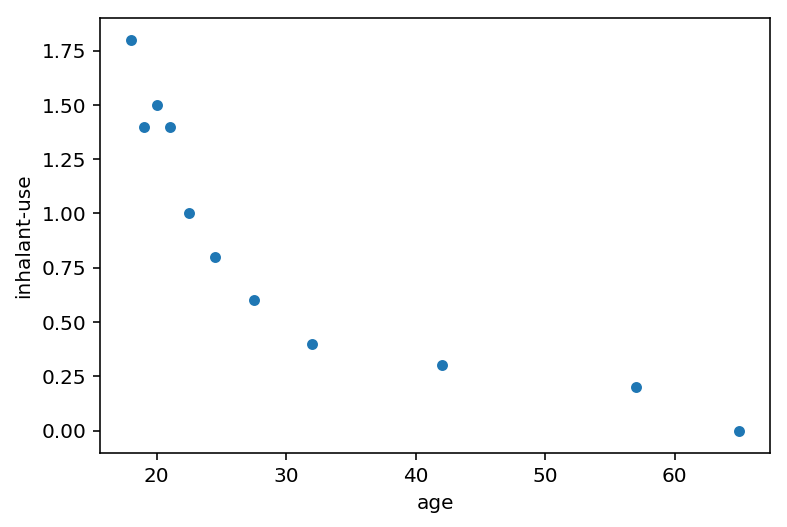

In [38]:
#Second, let's produce a scatter plot of these two variables.
df_hypothesis.plot.scatter(x='age',y='inhalant-use');

In [39]:
#Finally, let's calculate the pearson correlation coefficient and the corresponding p-value for these two variables:
from scipy.stats import pearsonr
pearsonr(df_hypothesis['age'],df_hypothesis['inhalant-use'])

(-0.8587459127984423, 0.00071152270648449)

### 4 Report
The Pearson correlation coefficient is -0.859, which indicates that there is a moderate-strong negative relationship between adult age and inhalant use. This means that as adults get older, they are less likely to use inhalants. Furthermore, given the p-value of 0.000712, we can reject the null hypothesis and conclude that this correlation is statistically significant. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [40]:
rate_list = sorted(sat_scores['Rate'])
print(rate_list);

[4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9, 9, 11, 11, 12, 12, 13, 13, 17, 18, 23, 26, 31, 33, 34, 51, 51, 52, 53, 53, 54, 55, 56, 57, 60, 63, 65, 65, 67, 68, 69, 69, 71, 71, 72, 77, 79, 81, 82]


In [41]:
# let's define outliers as any scores outside of (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
q1 = np.percentile(rate_list, 25)
q3 = np.percentile(rate_list, 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(lower_limit)
print(upper_limit)

-73.5
146.5


As we can see, none of the scores fall outside of this range. Thus, there are no outliers. 

As such, the mean, median and standard deviation of the 'Rate' variable won't change.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.